In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://www.worldbank.org/en/programs/debt-statistics/ids#analytical

- I think all these attributes are important but maybe starting to understand which countries are borrowing money especially at a very low interest seems to be a good place to start. So maybe like Use of IMF credit is a good choice. I am assuming that this is interest free credit, I could be wrong. So please correct me?

In [331]:
df = pd.read_excel('.//data//debt_statistics//Bolivia.xlsx', skiprows=1)
df = df.iloc[2:-6, :]
df.head()

,Unnamed: 0,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Total External debt stocks,6617.1,8141.8,8884,9895.2,10994.3,12990.1,13248.4,14301.2,15421.1
3,Use of IMF Credit,252.3,252.8,237.8,227.4,220.6,233.7,228.3,227,582.2
4,Long-term external debt,6035.1,7638.6,8357.3,9241.8,10298.6,12486.3,12317.1,13436.9,14261.4
5,Public and publicly guaranteed sector,4189.3,5281.7,5744.9,6335.5,7010.1,9150.7,9905.1,10999.9,11878.4
6,Public sector,4187.6,5280.5,5744.1,6335.1,7010.1,9150.7,9905.1,10999.9,11878.4


In [332]:
years = [i for i in range(2012,2021)]
# I wanted to unpivot to get year & value into 2 columns
df = df.melt(id_vars='Unnamed: 0', value_vars=years, var_name='year',value_name='value')
df['country'] = 'Bolivia'
df.columns = ['debt_statistic','year','value','country']
df = df.drop_duplicates()
df = df[df['value'] != '..']
df.head()

,debt_statistic,year,value,country
0,Total External debt stocks,2012,6617.1,Bolivia
1,Use of IMF Credit,2012,252.3,Bolivia
2,Long-term external debt,2012,6035.1,Bolivia
3,Public and publicly guaranteed sector,2012,4189.3,Bolivia
4,Public sector,2012,4187.6,Bolivia


In [333]:
df[df['debt_statistic'] =='Use of IMF Credit']

,debt_statistic,year,value,country
1,Use of IMF Credit,2012,252.3,Bolivia
65,Use of IMF Credit,2013,252.8,Bolivia
129,Use of IMF Credit,2014,237.8,Bolivia
193,Use of IMF Credit,2015,227.4,Bolivia
257,Use of IMF Credit,2016,220.6,Bolivia
321,Use of IMF Credit,2017,233.7,Bolivia
385,Use of IMF Credit,2018,228.3,Bolivia
449,Use of IMF Credit,2019,227,Bolivia
513,Use of IMF Credit,2020,582.2,Bolivia


In [334]:
def create_debt_dataframe(file_path, country):
    df = pd.read_excel(file_path, skiprows=1)
    df = df.iloc[2:-6, :]
    years = [i for i in range(2012,2021)]
    df = df.melt(id_vars='Unnamed: 0', value_vars=years, var_name='year',value_name='value')
    df['country'] = country
    df.columns = ['debt_statistic','year','value','country']
    df = df.drop_duplicates()
    df = df[df['value'] != '..']
    df[df['debt_statistic'] =='Use of IMF Credit']
    return df

In [335]:
## Latin America countries

bolivia_df         = create_debt_dataframe('.//data//debt_statistics//Bolivia.xlsx', 'Bolivia')
mexico_df          = create_debt_dataframe('.//data//debt_statistics//Mexico.xlsx', 'Mexico')
brazil_df          = create_debt_dataframe('.//data//debt_statistics//Brazil.xlsx', 'Brazil')
honduras_df        = create_debt_dataframe('.//data//debt_statistics//Honduras.xlsx','Honduras')
paraguay_df        = create_debt_dataframe('.//data//debt_statistics//Paraguay.xlsx', 'Paraguay')
argentina_df       = create_debt_dataframe('.//data//debt_statistics//Argentina.xlsx', 'Argentina')
cambodia_df        = create_debt_dataframe('.//data//debt_statistics//Cambodia.xlsx', 'Cambodia')
ecuador_df         = create_debt_dataframe('.//data//debt_statistics//Ecuador.xlsx', 'Ecuador')
guatemala_df       = create_debt_dataframe('.//data//debt_statistics//Guatemala.xlsx', 'Guatemala')
nicaragua_df       = create_debt_dataframe('.//data//debt_statistics//Nicaragua.xlsx', 'Nicaragua')
peru_df            = create_debt_dataframe('.//data//debt_statistics//Peru.xlsx', 'Peru')
costa_Rica_df         = create_debt_dataframe('.//data//debt_statistics//Costa Rica.xlsx', 'Costa Rica')
dominican_Republic_df = create_debt_dataframe('.//data//debt_statistics//Dominican Republic.xlsx', 'Dominican Republic')
el_Salvador_df     = create_debt_dataframe('.//data//debt_statistics//El Salvador.xlsx', 'El Salvador')
panama_df          = create_debt_dataframe('.//data//debt_statistics//Panama.xlsx', 'Panama')
venezuela_df     = create_debt_dataframe('.//data//debt_statistics//Venezuela.xlsx', 'Venezuela')

In [336]:
debt_statistic_df = pd.concat([bolivia_df,mexico_df,brazil_df,honduras_df,paraguay_df,argentina_df,cambodia_df,ecuador_df,guatemala_df,nicaragua_df,peru_df,costa_Rica_df,dominican_Republic_df,el_Salvador_df,panama_df,venezuela_df])
debt_statistic_df

,debt_statistic,year,value,country
0,Total External debt stocks,2012,6617.1,Bolivia
1,Use of IMF Credit,2012,252.3,Bolivia
2,Long-term external debt,2012,6035.1,Bolivia
3,Public and publicly guaranteed sector,2012,4189.3,Bolivia
4,Public sector,2012,4187.6,Bolivia
...,...,...,...,...
565,Net equity inflows,2020,NaN,Venezuela
566,Foreign direct investment,2020,958.7,Venezuela
568,Debt ratios,2020,NaN,Venezuela
572,Short-term to external debt stocks (%),2020,30.9,Venezuela


In [337]:
statistics = ['Total External debt stocks','Use of IMF Credit','Long-term external debt','short-term external debt']
debt_statistic_df[debt_statistic_df['debt_statistic'].isin(statistics)]

,debt_statistic,year,value,country
0,Total External debt stocks,2012,6617.1,Bolivia
1,Use of IMF Credit,2012,252.3,Bolivia
2,Long-term external debt,2012,6035.1,Bolivia
64,Total External debt stocks,2013,8141.8,Bolivia
65,Use of IMF Credit,2013,252.8,Bolivia
...,...,...,...,...
449,Use of IMF Credit,2019,3516.9,Venezuela
450,Long-term external debt,2019,127629.3,Venezuela
512,Total External debt stocks,2020,189305.6,Venezuela
513,Use of IMF Credit,2020,3663,Venezuela


<AxesSubplot:xlabel='year', ylabel='value'>

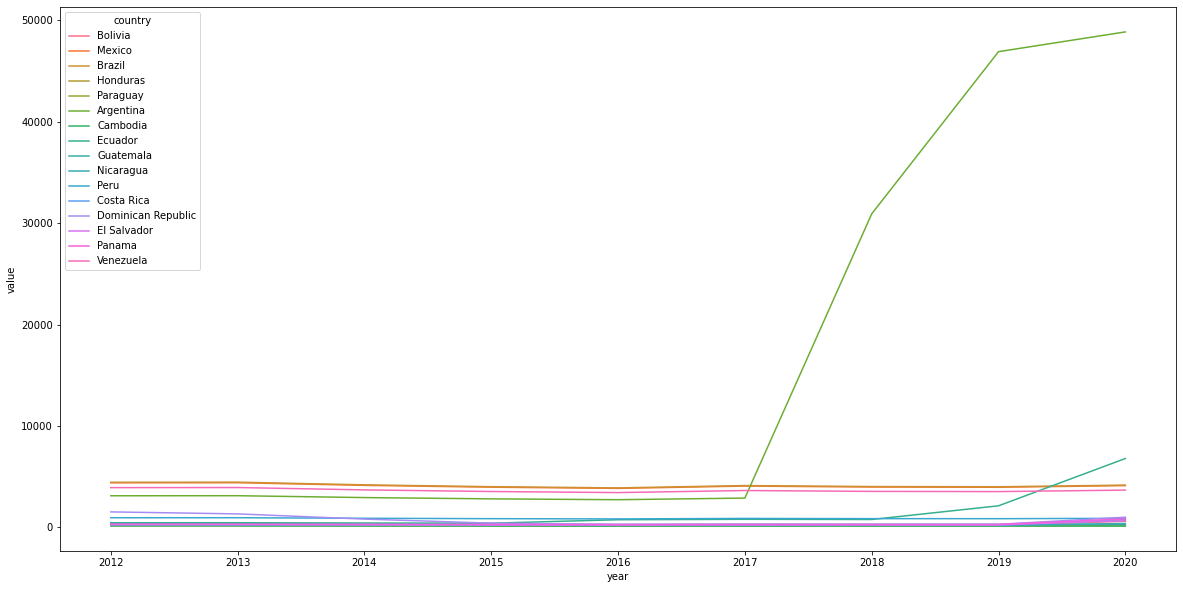

In [338]:
plt.figure(figsize=(20,10))
debt_statistic_imf_credit_df = debt_statistic_df[debt_statistic_df['debt_statistic'] =='Use of IMF Credit'].reset_index(drop=True)
sns.lineplot(x='year',y='value',data=debt_statistic_imf_credit_df, hue='country')

<AxesSubplot:xlabel='year', ylabel='value'>

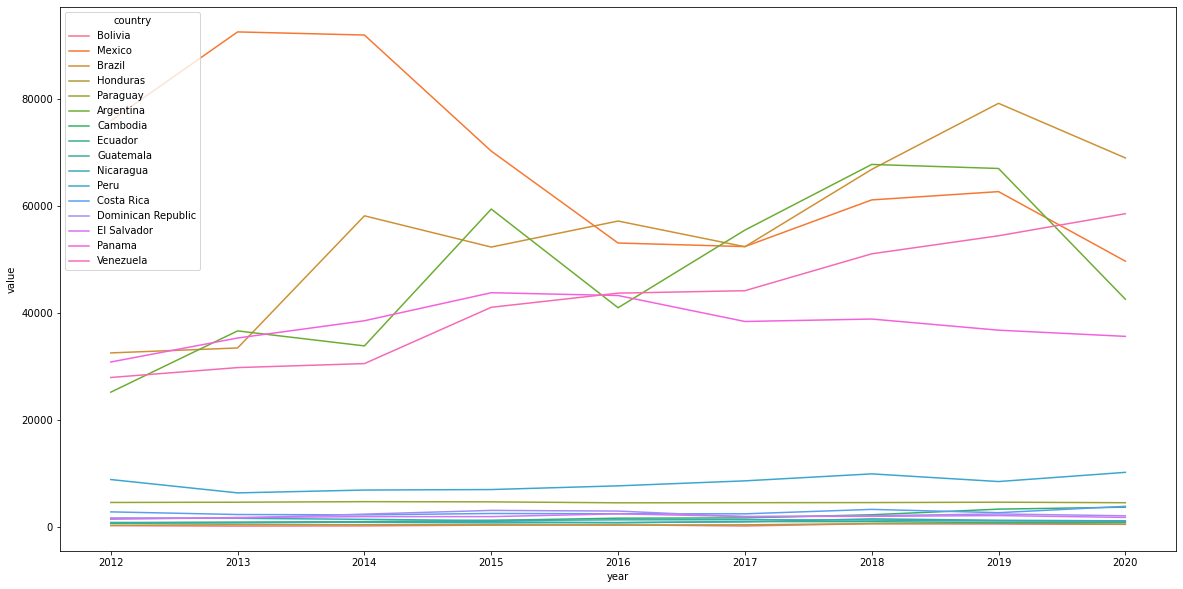

In [339]:
plt.figure(figsize=(20,10))
debt_statistic_imf_credit_df = debt_statistic_df[debt_statistic_df['debt_statistic'] =='Short-term external debt'].reset_index(drop=True)
sns.lineplot(x='year',y='value',data=debt_statistic_imf_credit_df, hue='country')

<AxesSubplot:xlabel='year', ylabel='value'>

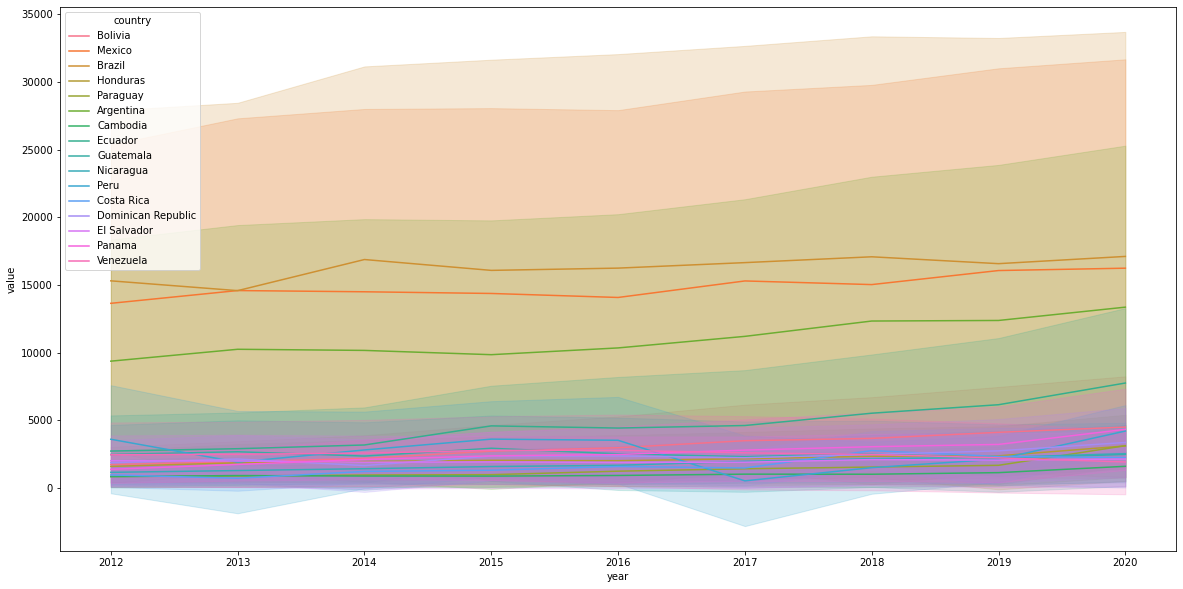

In [340]:
plt.figure(figsize=(20,10))
debt_statistic_imf_credit_df = debt_statistic_df[debt_statistic_df['debt_statistic'] =='Multilateral'].reset_index(drop=True)
sns.lineplot(x='year',y='value',data=debt_statistic_imf_credit_df, hue='country')

<AxesSubplot:xlabel='year', ylabel='value'>

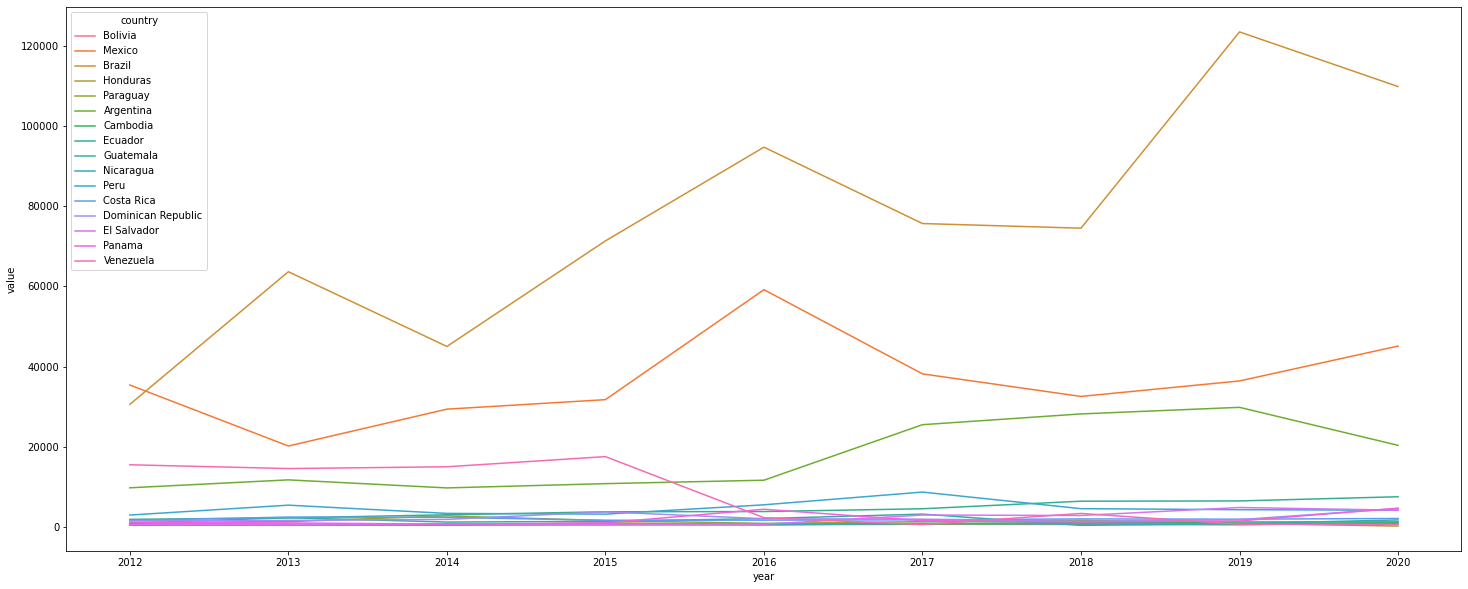

In [341]:
plt.figure(figsize=(25,10))
debt_statistic_imf_credit_df = debt_statistic_df[debt_statistic_df['debt_statistic'] =='Principal repayments (long-term)'].reset_index(drop=True)
sns.lineplot(x='year',y='value',data=debt_statistic_imf_credit_df, hue='country')

<AxesSubplot:xlabel='year', ylabel='value'>

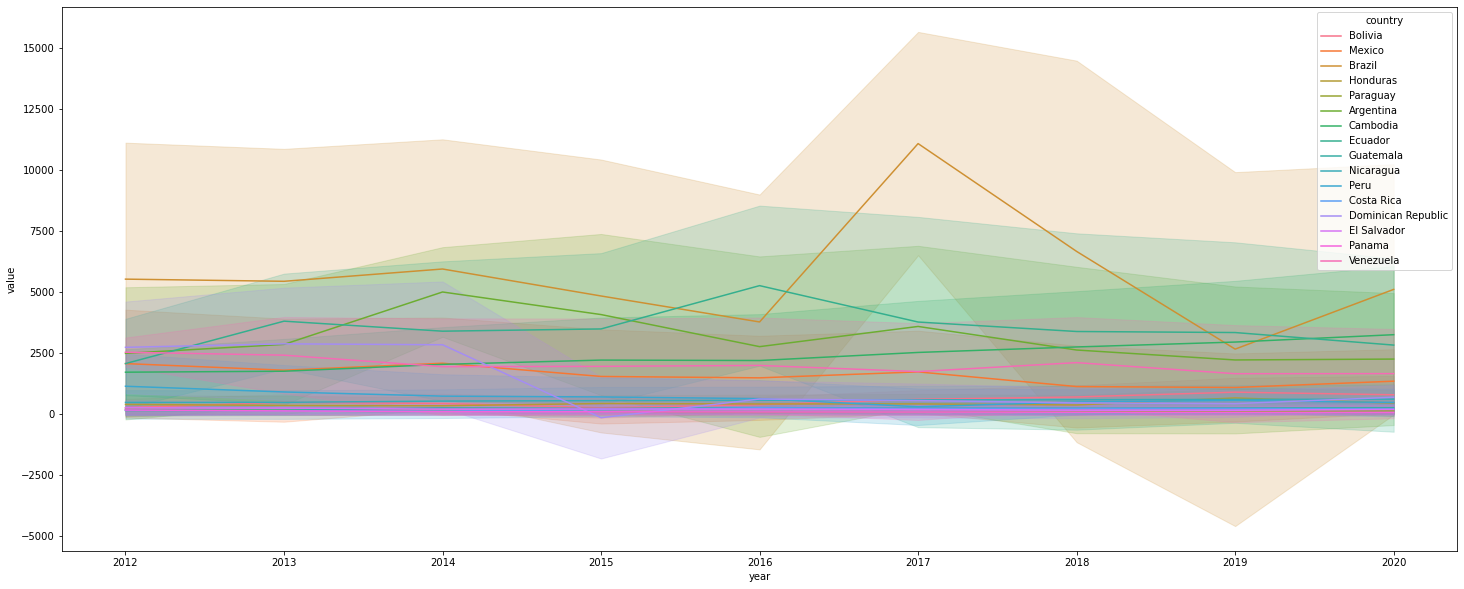

In [342]:
plt.figure(figsize=(25,10))
debt_statistic_imf_credit_df = debt_statistic_df[debt_statistic_df['debt_statistic'] =='Bilateral'].reset_index(drop=True)
sns.lineplot(x='year',y='value',data=debt_statistic_imf_credit_df, hue='country')

In [343]:
# Load Population & normalize the values by population size or GDP??

In [344]:
population_df = pd.read_csv('.//data//population//population.csv', skiprows=4)

In [345]:
population_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN


In [346]:
debt_statistic_imf_credit_df.head()

,debt_statistic,year,value,country
0,Bilateral,2012,633.3,Bolivia
1,Bilateral,2012,-99.3,Bolivia
2,Bilateral,2013,809.5,Bolivia
3,Bilateral,2013,167.7,Bolivia
4,Bilateral,2014,840.1,Bolivia


In [347]:
countries_list = debt_statistic_imf_credit_df['country'].unique()
#countries_list.extend(['Korea, Rep.'])
years_list = debt_statistic_imf_credit_df['year'].unique().tolist()
years_list = [str(year) for year in years_list]

In [348]:
countries_list = list(countries_list)
countries_list.append('Korea, Rep.')
countries_list

['Bolivia',
 'Mexico',
 'Brazil',
 'Honduras',
 'Paraguay',
 'Argentina',
 'Cambodia',
 'Ecuador',
 'Guatemala',
 'Nicaragua',
 'Peru',
 'Costa Rica',
 'Dominican Republic',
 'El Salvador',
 'Panama',
 'Venezuela',
 'Korea, Rep.']

In [349]:
column_filter = years_list
column_filter.extend(['Country Name'])
population_df = population_df.loc[population_df['Country Name'].isin(countries_list),years_list]

In [350]:
population_df.columns

Index(['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       'Country Name'],
      dtype='object')

In [351]:
population_df.head()

,2012,2013,2014,2015,2016,2017,2018,2019,2020,Country Name
9,41733271.0,42202935.0,42669500.0,43131966.0,43590368.0,44044811.0,44494502.0,44938712.0,45376763.0,Argentina
28,10377677.0,10542375.0,10706517.0,10869732.0,11031822.0,11192853.0,11353140.0,11513102.0,11673029.0,Bolivia
29,199287292.0,201035904.0,202763744.0,204471759.0,206163056.0,207833825.0,209469320.0,211049519.0,212559409.0,Brazil
48,4688003.0,4742111.0,4795390.0,4847805.0,4899336.0,4949955.0,4999443.0,5047561.0,5094114.0,Costa Rica
59,9930916.0,10048226.0,10165182.0,10281675.0,10397738.0,10513111.0,10627147.0,10738957.0,10847904.0,Dominican Republic


In [352]:
population_df= population_df.melt(id_vars='Country Name', value_vars=years_list, var_name='year',value_name='value')
population_df.columns = ['country','year','population']
population_df.head()

,country,year,population
0,Argentina,2012,41733271.0
1,Bolivia,2012,10377677.0
2,Brazil,2012,199287292.0
3,Costa Rica,2012,4688003.0
4,Dominican Republic,2012,9930916.0


In [353]:
population_df.country = population_df.country.str.strip().str.lower()
population_df.year = population_df.year.astype('int')
population_df = population_df.set_index(['country','year'])

In [354]:
population_df.dtypes

population    float64
dtype: object

In [355]:
debt_statistic_df['value'] = debt_statistic_df['value'].astype('float64')
debt_statistic_df.country = debt_statistic_df.country.str.strip().str.lower()
debt_statistic_df.year = debt_statistic_df.year.astype('int')
debt_statistic_df = debt_statistic_df.set_index(['country','year'])

In [356]:
debt_statistic_df.dtypes

debt_statistic     object
value             float64
dtype: object

In [357]:
debt_population_df = debt_statistic_df.merge(population_df, how='left', left_index=True, right_index=True).reset_index()
debt_population_df['debt_normalized_by_population'] = debt_population_df['value']/debt_population_df['population']
debt_population_df['population_normalized_by_debt'] = debt_population_df['population']/debt_population_df['value']

row_filter = (debt_population_df['debt_statistic']=='Long-term external debt') & (debt_population_df['year']== 2020)
debt_population_df.loc[row_filter,:]

,country,year,debt_statistic,value,population,debt_normalized_by_population,population_normalized_by_debt
467,argentina,2020,Long-term external debt,162279.5,45376763.0,0.003576,279.621043
992,bolivia,2020,Long-term external debt,14261.4,11673029.0,0.001222,818.505126
1529,brazil,2020,Long-term external debt,476093.1,212559409.0,0.002240,446.466057
1991,cambodia,2020,Long-term external debt,13659.2,16718971.0,0.000817,1224.008068
2494,costa rica,2020,Long-term external debt,26588.5,5094114.0,0.005219,191.590876
3036,dominican republic,2020,Long-term external debt,41307.8,10847904.0,0.003808,262.611516
3577,ecuador,2020,Long-term external debt,48468.0,17643060.0,0.002747,364.014608
4100,el salvador,2020,Long-term external debt,15812.9,6486201.0,0.002438,410.184153
4590,guatemala,2020,Long-term external debt,23617.3,16858333.0,0.001401,713.812883
5060,honduras,2020,Long-term external debt,9733.4,9904608.0,0.000983,1017.589743


In [358]:
debt_population_df['debt_statistic'].unique()

array(['Total External debt stocks', 'Use of IMF Credit',
       'Long-term external debt', 'Public and publicly guaranteed sector',
       'Public sector', 'of which: General Government',
       'Private sector guaranteed by public sector',
       'Private sector not guaranteed', 'Short-term external debt',
       'Disbursements (long-term)', 'Principal repayments (long-term)',
       'Interest payments (long-term)',
       'Summary external debt stock by creditor type',
       'Long-term External debt stocks',
       'Public and publicly guaranteed debt from:', 'Official creditors',
       'Multilateral', 'Bilateral', 'Private creditors', 'Bondholders',
       'Commercial banks and others',
       '\xa0\xa0Private nonguaranteed debt from:',
       'Net financial inflows', 'Net debt inflows', 'Long-term',
       'Banks and other private', 'Short-term', 'Net equity inflows',
       'Foreign direct investment', 'Portfolio equity', 'Debt ratios',
       'External debt stocks to exports (

## Graphs for IMF Credit Analysis

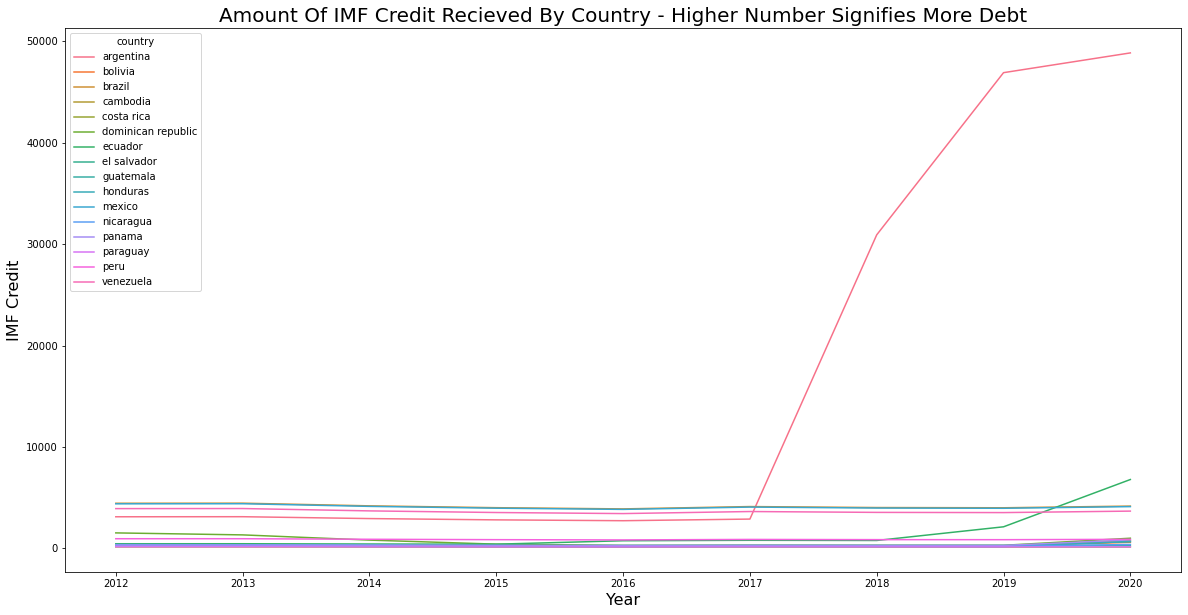

In [359]:
plt.figure(figsize=(20,10))
plt.title('Amount Of IMF Credit Recieved By Country - Higher Number Signifies More Debt', fontsize = 20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('IMF Credit', fontsize=16)
debt_population_plot_df = debt_population_df[debt_population_df['debt_statistic'] =='Use of IMF Credit'].reset_index(drop=True)
sns.lineplot(x='year',y='value',data=debt_population_plot_df, hue='country')
plt.show()

In [360]:
debt_population_plot_df[debt_population_plot_df['year']==2020].sort_values(by='value', ascending=False)[['country','value']].head(3)

,country,value
8,argentina,48873.7
62,ecuador,6780.5
26,brazil,4158.2


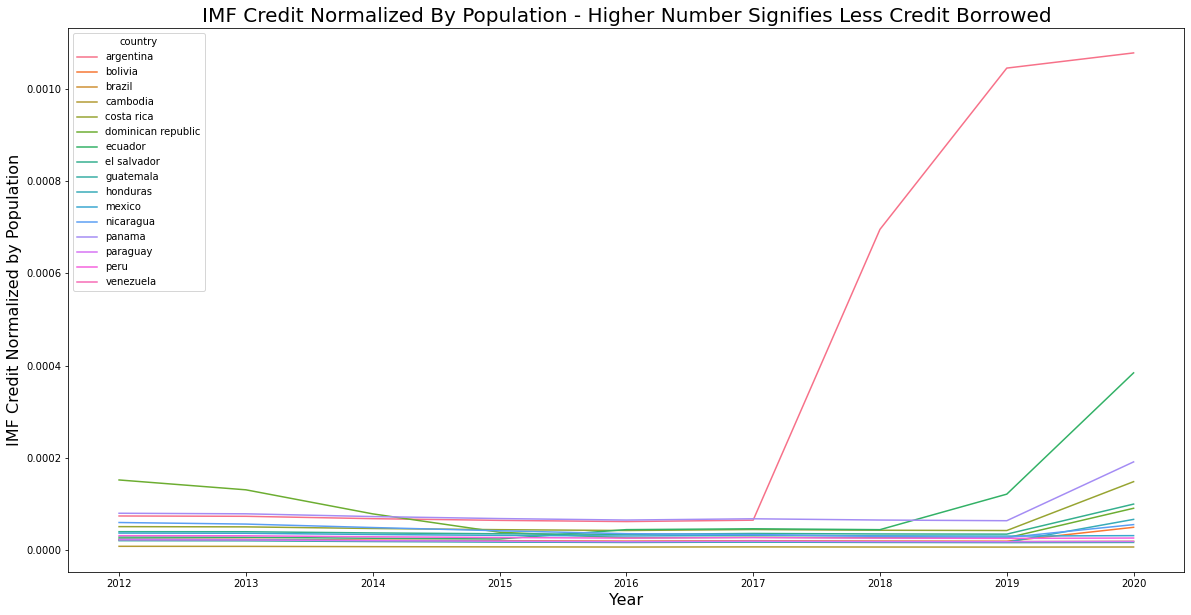

In [361]:
plt.figure(figsize=(20,10))
plt.title('IMF Credit Normalized By Population - Higher Number Signifies Less Credit Borrowed', fontsize = 20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('IMF Credit Normalized by Population', fontsize=16)
debt_population_plot_df = debt_population_df[debt_population_df['debt_statistic'] =='Use of IMF Credit'].reset_index(drop=True)
sns.lineplot(x='year',y='debt_normalized_by_population',data=debt_population_plot_df, hue='country')
plt.show()

In [362]:
debt_population_plot_df[debt_population_plot_df['year']==2020].sort_values(by='debt_normalized_by_population', ascending=False)[['country','debt_normalized_by_population']].head(3)

,country,debt_normalized_by_population
8,argentina,0.001077
62,ecuador,0.000384
116,panama,0.000192


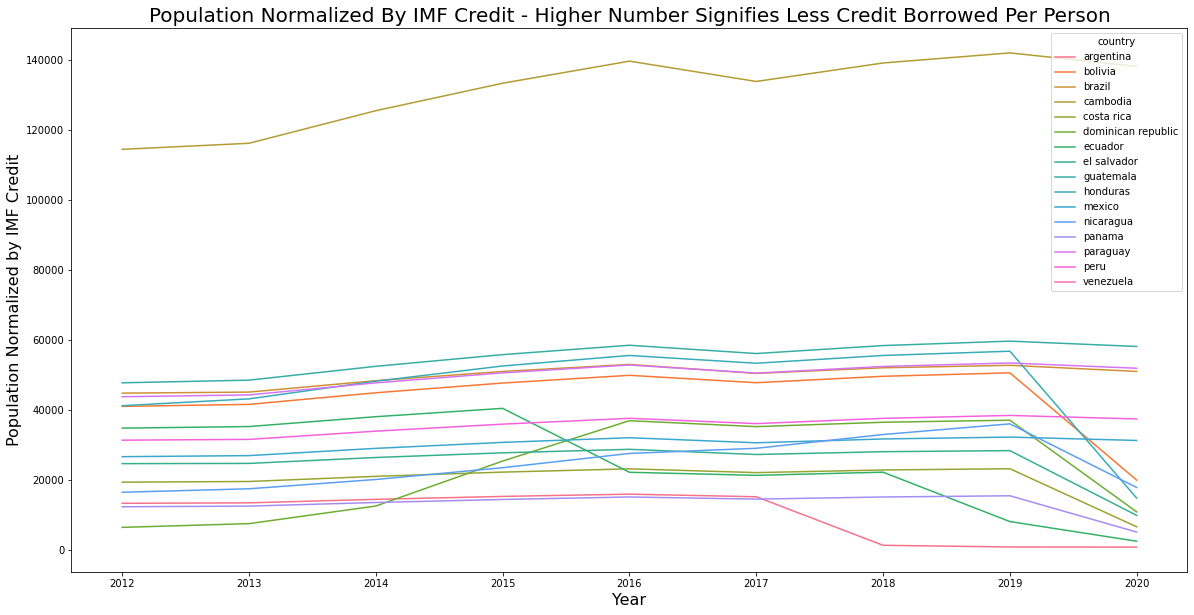

In [363]:
plt.figure(figsize=(20,10))
plt.title('Population Normalized By IMF Credit - Higher Number Signifies Less Credit Borrowed Per Person', fontsize = 20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Population Normalized by IMF Credit', fontsize=16)
debt_population_plot_df = debt_population_df[debt_population_df['debt_statistic'] =='Use of IMF Credit'].reset_index(drop=True)
sns.lineplot(x='year',y='population_normalized_by_debt',data=debt_population_plot_df, hue='country')
plt.show()

In [364]:
debt_population_plot_df[debt_population_plot_df['year']==2020].sort_values(by='population_normalized_by_debt', ascending=True)[['country','population_normalized_by_debt']].tail(3)

,country,population_normalized_by_debt
80,guatemala,58252.705598
35,cambodia,138287.601323
143,venezuela,NaN


## Graphs for Long Term Debt
- Long term debt to me tells that they are borrowing at a lower interest
- Long term debt may also mean that the country has to pay more in interest because they pay over longer periods
- Long term debt may also mean that the country is not going be able to fulfill it's debts quickly
- Long term debt may also mean that the country is going to struggle in the short-term
- Long term debt may also mean that the country is trying to set a plan for the long-term

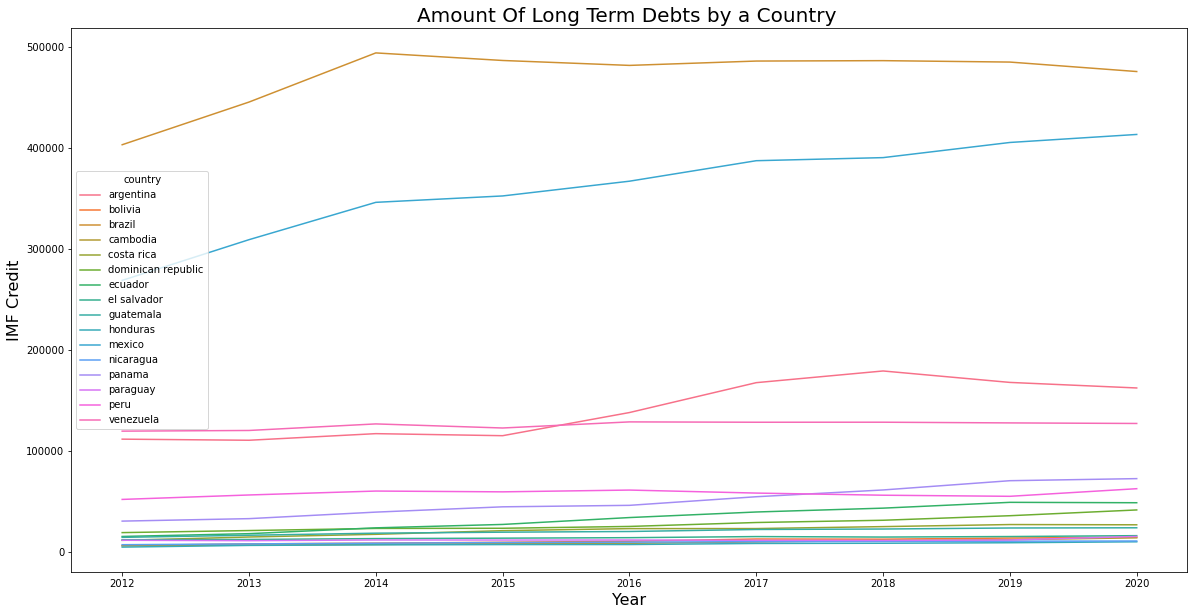

In [365]:
plt.figure(figsize=(20,10))
plt.title('Amount Of Long Term Debts by a Country ', fontsize = 20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('IMF Credit', fontsize=16)
debt_population_plot_df = debt_population_df[debt_population_df['debt_statistic'] =='Long-term external debt'].reset_index(drop=True)
sns.lineplot(x='year',y='value',data=debt_population_plot_df, hue='country')
plt.show()

In [366]:
debt_population_plot_df[debt_population_plot_df['year']==2020].sort_values(by='value', ascending=False)[['country','value']].head(3)

,country,value
26,brazil,476093.1
98,mexico,413696.2
8,argentina,162279.5


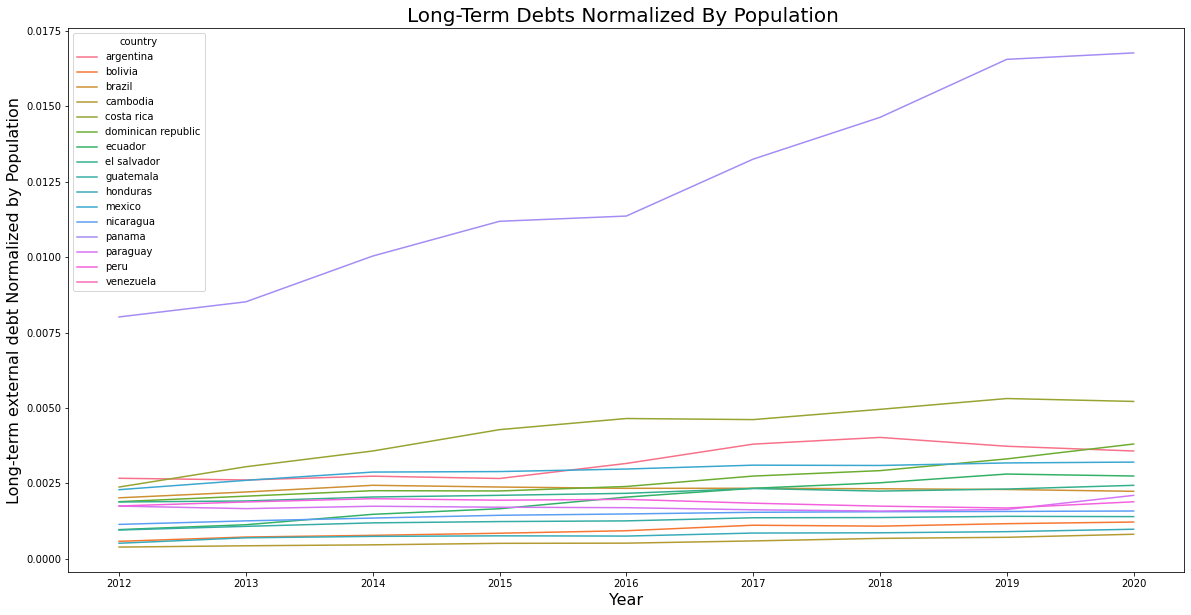

In [367]:
plt.figure(figsize=(20,10))
plt.title('Long-Term Debts Normalized By Population ', fontsize = 20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Long-term external debt Normalized by Population', fontsize=16)
debt_population_plot_df = debt_population_df[debt_population_df['debt_statistic'] =='Long-term external debt'].reset_index(drop=True)
sns.lineplot(x='year',y='debt_normalized_by_population',data=debt_population_plot_df, hue='country')
plt.show()

In [368]:
debt_population_plot_df[debt_population_plot_df['year']==2020].sort_values(by='debt_normalized_by_population', ascending=False)[['country','debt_normalized_by_population']].head(3)

,country,debt_normalized_by_population
116,panama,0.016772
44,costa rica,0.005219
53,dominican republic,0.003808


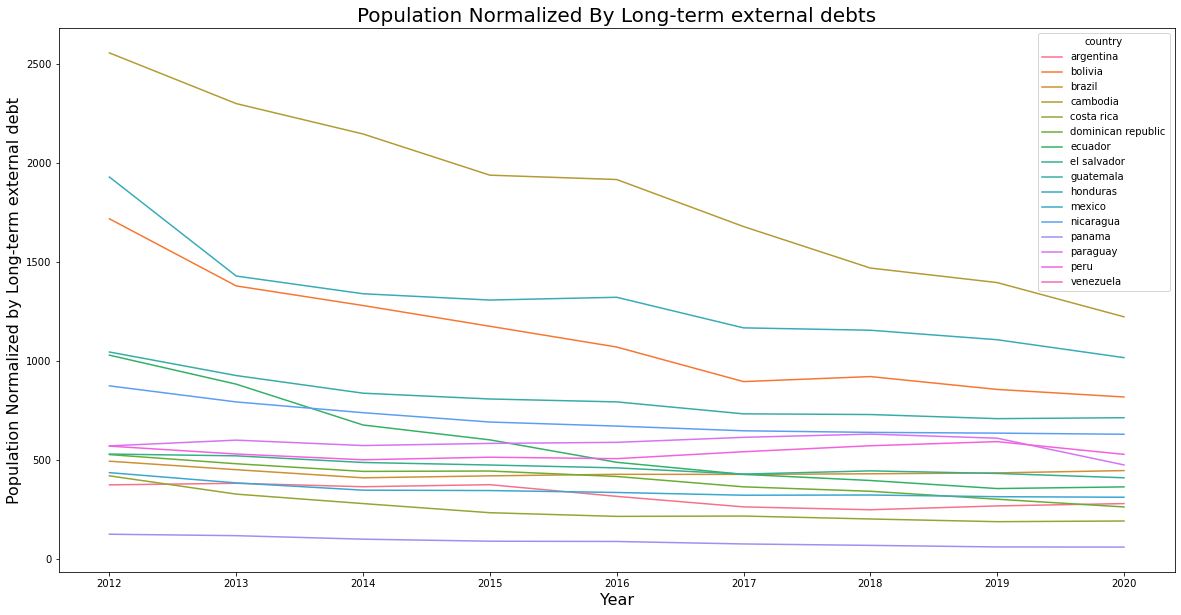

In [369]:
plt.figure(figsize=(20,10))
plt.title('Population Normalized By Long-term external debts', fontsize = 20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Population Normalized by Long-term external debt', fontsize=16)
debt_population_plot_df = debt_population_df[debt_population_df['debt_statistic'] =='Long-term external debt'].reset_index(drop=True)
sns.lineplot(x='year',y='population_normalized_by_debt',data=debt_population_plot_df, hue='country')
plt.show()

In [370]:
debt_population_plot_df[debt_population_plot_df['year']==2020].sort_values(by='population_normalized_by_debt', ascending=True)[['country','population_normalized_by_debt']].tail(3)

,country,population_normalized_by_debt
89,honduras,1017.589743
35,cambodia,1224.008068
143,venezuela,NaN


In [416]:
gdp_df = pd.read_excel('.//data//gdp//gdp.xlsx', skiprows=2, header=1)

In [417]:
gdp_df[gdp_df['Country Name'].str.contains('Kor')]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
126,"Korea, Rep.",KOR,GDP (current US$),NY.GDP.MKTP.CD,3.958191e+09,2.417558e+09,2.814319e+09,3.988785e+09,3.458939e+09,3.120833e+09,...,1.278428e+12,1.370795e+12,1.484318e+12,1.465773e+12,1.500112e+12,1.623901e+12,1.724846e+12,1.651423e+12,1.637896e+12,NaN
193,"Korea, Dem. People's Rep.",PRK,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [418]:
countries_list = debt_statistic_imf_credit_df['country'].unique()
years_list = debt_statistic_imf_credit_df['year'].unique().tolist()
years_list = [str(year) for year in years_list]
column_filter = years_list
column_filter.extend(['Country Name'])
gdp_df = gdp_df.loc[gdp_df['Country Name'].isin(countries_list),years_list]

In [419]:
gdp_df= gdp_df.melt(id_vars='Country Name', value_vars=years_list, var_name='year',value_name='value')
gdp_df.columns = ['country','year','gdp']
gdp_df.head()

,country,year,gdp
0,Argentina,2012,5.459824e+11
1,Bolivia,2012,2.708450e+10
2,Brazil,2012,2.465228e+12
3,Costa Rica,2012,4.723165e+10
4,Dominican Republic,2012,6.068154e+10


In [420]:
gdp_df.year = gdp_df.year.astype('int')
gdp_df.country = gdp_df.country.str.strip().str.lower()

In [421]:
debt_population_df = debt_population_df.set_index(['country','year'])
gdp_df = gdp_df.set_index(['country','year'])
gdp_graph_df = gdp_df.merge(debt_population_df, how='left', left_index=True, right_index=True).reset_index()

In [434]:
gdp_graph_df['log_gdp'] = np.log(gdp_graph_df['gdp'])
gdp_graph_df.head()
#gdp_df = gdp_df.reset_index()
#debt_population_df = debt_population_df.reset_index()

,country,year,gdp,debt_statistic,value,population,debt_normalized_by_population,population_normalized_by_debt,log_gdp
0,argentina,2012,5.459824e+11,Total External debt stocks,139877.7,41733271.0,0.003352,298.355428,27.025853
1,argentina,2012,5.459824e+11,Use of IMF Credit,3104.6,41733271.0,0.000074,13442.398699,27.025853
2,argentina,2012,5.459824e+11,Long-term external debt,111521.1,41733271.0,0.002672,374.218610,27.025853
3,argentina,2012,5.459824e+11,Public and publicly guaranteed sector,70577.7,41733271.0,0.001691,591.309592,27.025853
4,argentina,2012,5.459824e+11,Public sector,70480.2,41733271.0,0.001689,592.127590,27.025853


In [436]:
gdp_graph_df.to_csv('.\\data\\summary\\debt_population_gdp_latin_american.csv')

In [423]:
gdp_graph_df.dtypes

country                           object
year                               int64
gdp                              float64
debt_statistic                    object
value                            float64
population                       float64
debt_normalized_by_population    float64
population_normalized_by_debt    float64
dtype: object

<AxesSubplot:xlabel='value', ylabel='gdp'>

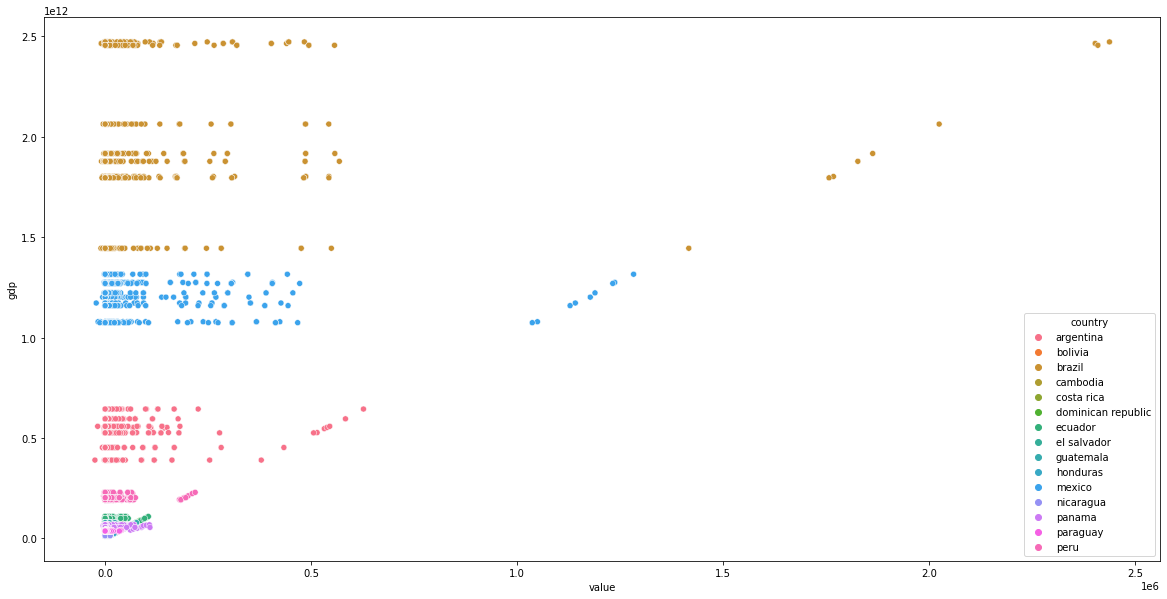

In [431]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='value', y='gdp',data=gdp_graph_df,hue='country')

<AxesSubplot:xlabel='debt_normalized_by_population', ylabel='gdp'>

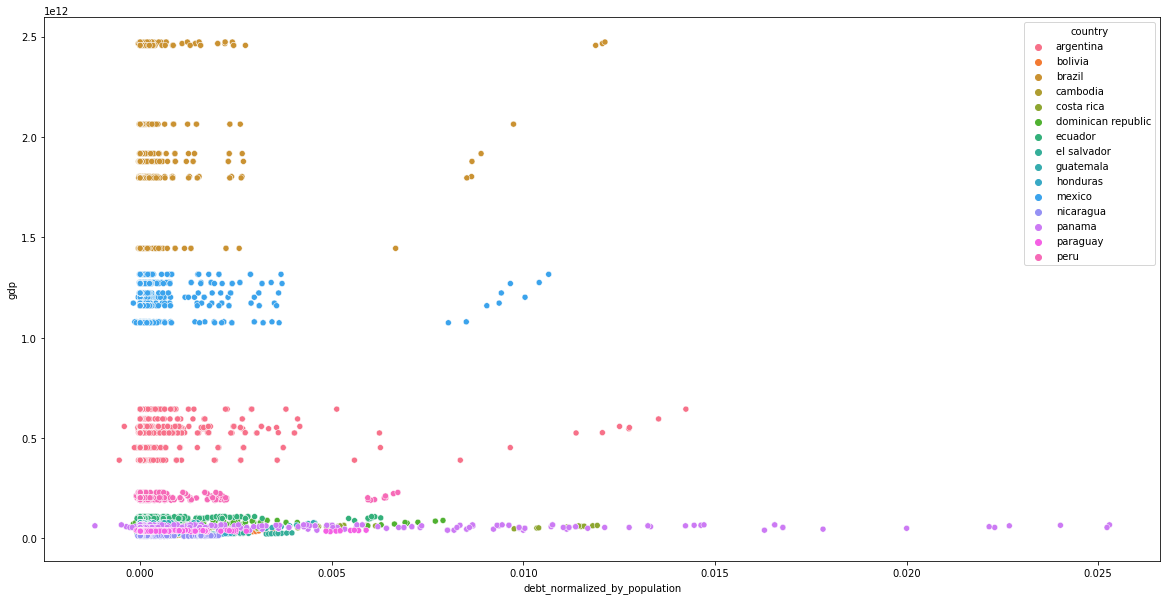

In [433]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='debt_normalized_by_population', y='gdp',data=gdp_graph_df,hue='country')

<AxesSubplot:xlabel='debt_normalized_by_population', ylabel='log_gdp'>

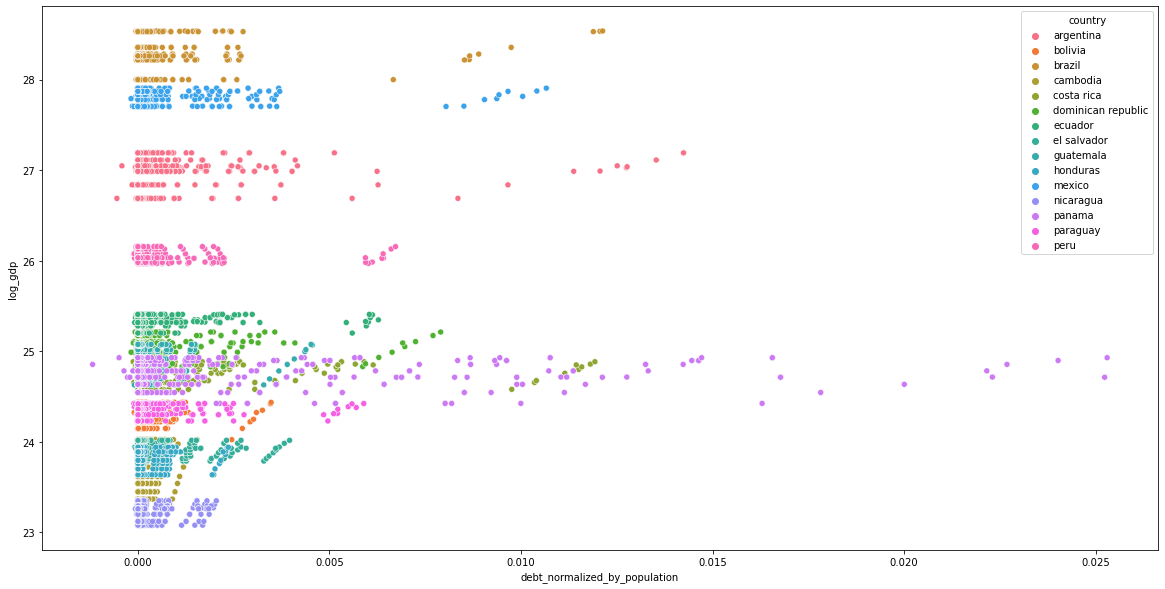

In [435]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='debt_normalized_by_population', y='log_gdp',data=gdp_graph_df,hue='country')

<AxesSubplot:xlabel='year', ylabel='value'>

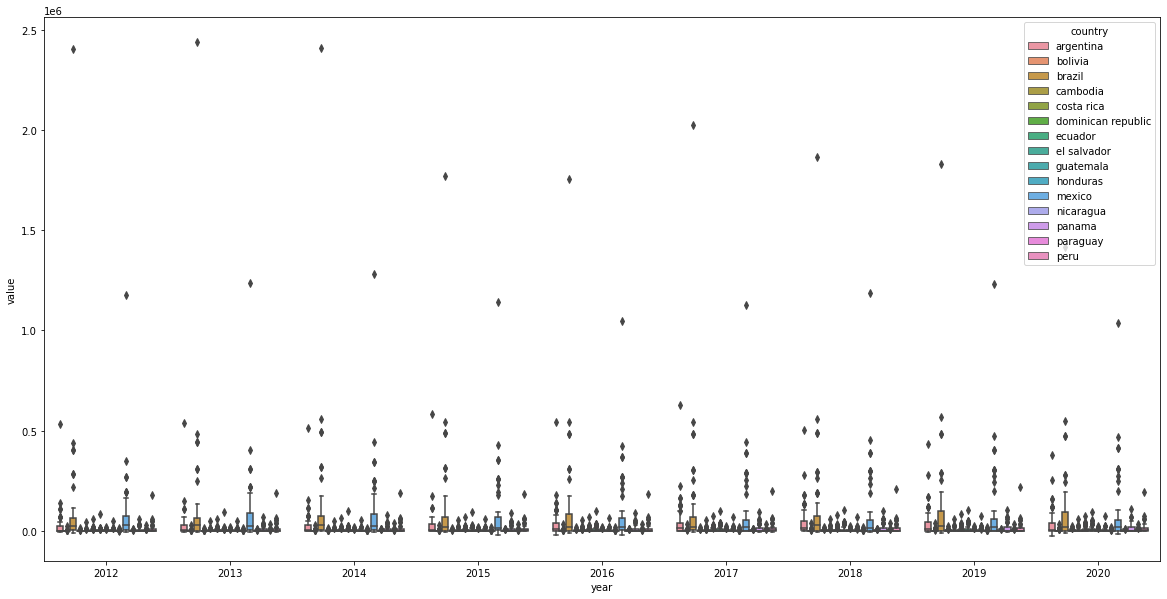

In [432]:
plt.figure(figsize=(20,10))
sns.boxplot(x='year',y='value',data=gdp_graph_df,hue='country')